In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
datos = {
    'compras': [150, 200, 250, 280, 300, 350, 390, 600, 700, 750],
    'uso_tarje_credito': [3, 5, 6, 8, 9, 11, 10, 11, 12, 14]
}

In [ ]:
df = pd.DataFrame(datos)
df

compras  uso_tarje_credito
0      150                  3
1      200                  5
2      250                  6
3      280                  8
4      300                  9
5      350                 11
6      390                 10
7      600                 11
8      700                 12
9      750                 14

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

array([[-1.22824784, -1.82164719],
       [-0.97961468, -1.20413967],
       [-0.73098151, -0.89538591],
       [-0.58180161, -0.27787838],
       [-0.48234834,  0.03087538],
       [-0.23371518,  0.6483829 ],
       [-0.03480864,  0.33962914],
       [ 1.00945066,  0.6483829 ],
       [ 1.50671699,  0.95713666],
       [ 1.75535016,  1.57464418]])

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
centroids = kmeans.cluster_centers_
centroids

array([[-0.33316844,  0.18525226],
       [ 1.42383927,  1.06005458],
       [-0.97961468, -1.30705759]])

In [ ]:
inertia = kmeans.inertia_
inertia

1.9614863071402957

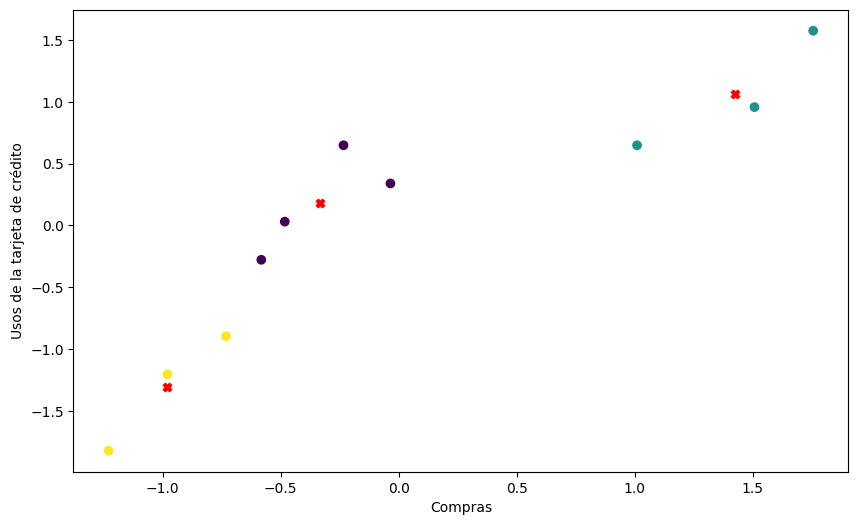

In [ ]:
# df_scaled[:,0] = Coordenada del eje X. Selecciona todas las filas de la primera columna
# df_scaled[:,1] = Coordenada del eje Y
plt.figure(figsize=(10, 6))
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=labels) # 10 DATOS
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', c='red') #CENTROIDES
plt.xlabel('Compras')
plt.ylabel('Usos de la tarjeta de crédito')
plt.show()


In [ ]:
df

compras  uso_tarje_credito
0      150                  3
1      200                  5
2      250                  6
3      280                  8
4      300                  9
5      350                 11
6      390                 10
7      600                 11
8      700                 12
9      750                 14

In [ ]:
inertia = 0
silueta_score = -1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


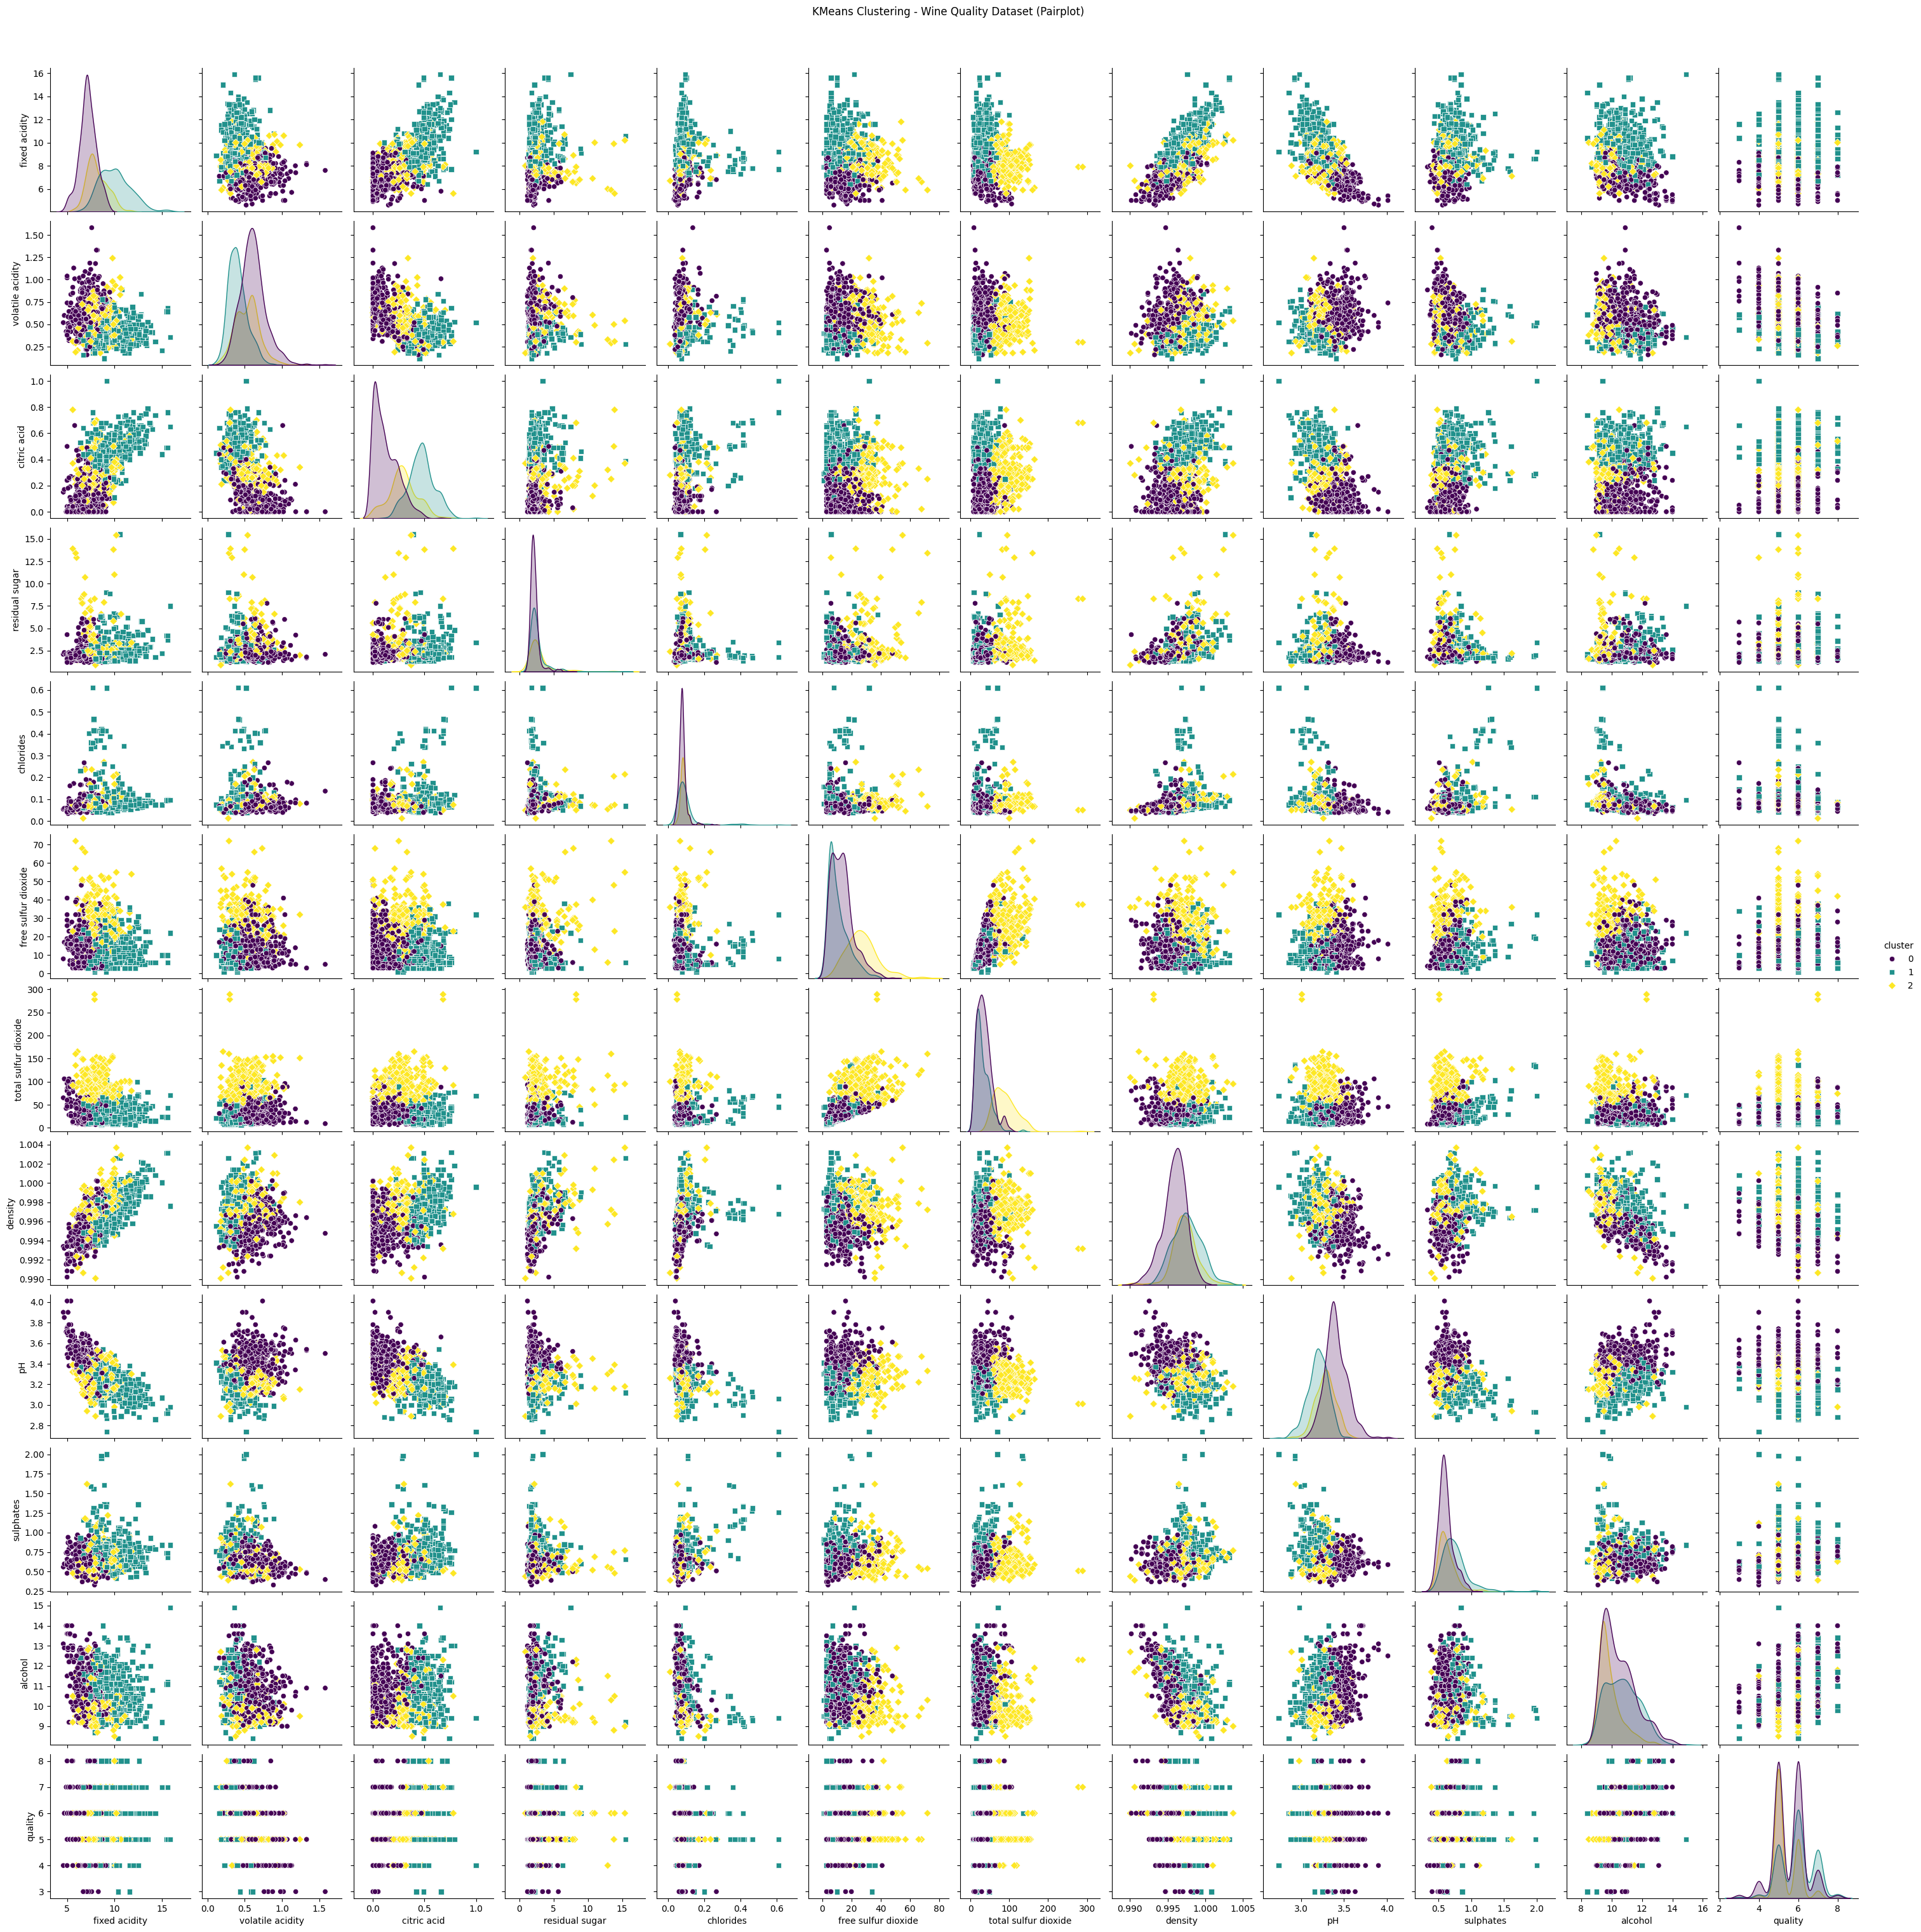

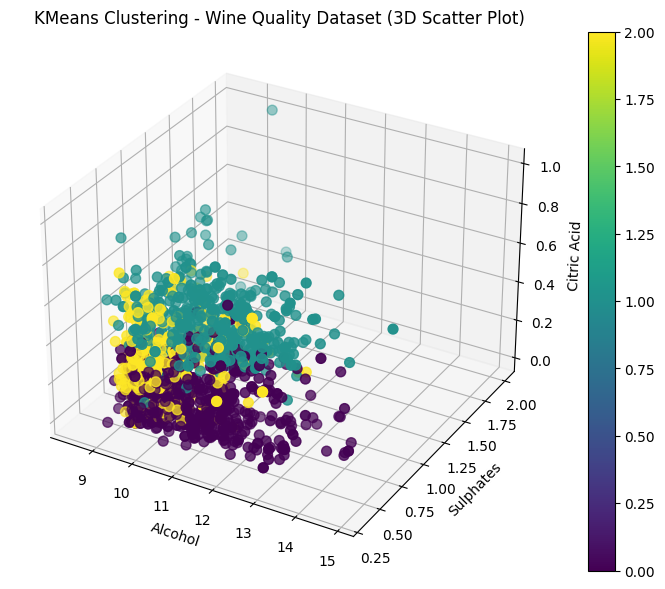

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos de Wine Quality
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, delimiter=';')

# Escalar los datos para mejorar el desempeño en KMeans
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('quality', axis=1))

# Aplicar KMeans con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

# Visualización de los clusters usando pairplot
sns.pairplot(df, hue='cluster', diag_kind='kde', palette='viridis', markers=["o", "s", "D"])
plt.suptitle('KMeans Clustering - Wine Quality Dataset (Pairplot)', y=1.02)
plt.show()

# Visualización en 3D para algunas características seleccionadas
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['alcohol'], df['sulphates'], df['citric acid'], c=df['cluster'], cmap='viridis', s=50)

ax.set_xlabel('Alcohol')
ax.set_ylabel('Sulphates')
ax.set_zlabel('Citric Acid')
plt.title('KMeans Clustering - Wine Quality Dataset (3D Scatter Plot)')
plt.colorbar(scatter)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


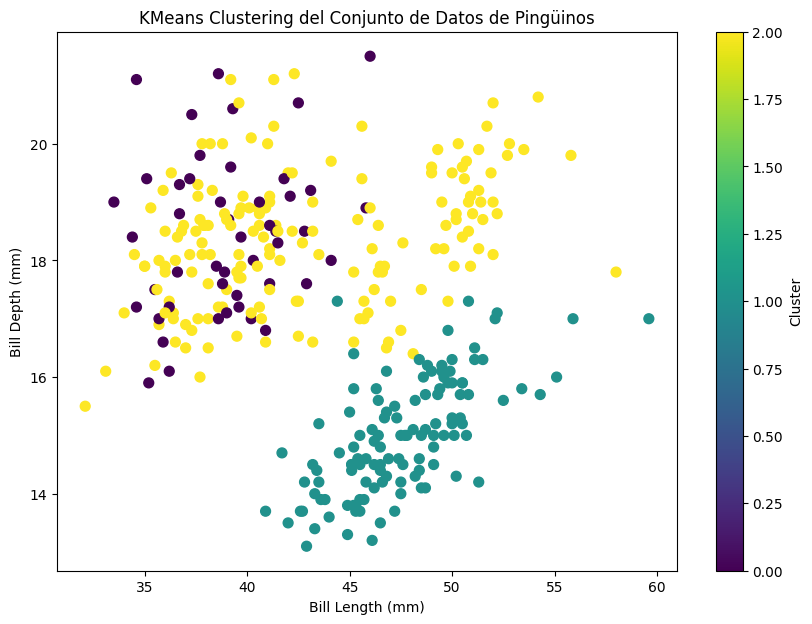

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos de los pingüinos
df = sns.load_dataset('penguins')

# Eliminar filas con valores nulos
df = df.dropna()

# Convertir columnas categóricas a variables dummy
df = pd.get_dummies(df, columns=['island', 'sex'], drop_first=True)

# Separar la columna de etiquetas (species)
df_features = df.drop(['species'], axis=1)

# Escalar los datos para mejorar el desempeño en KMeans
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

# Aplicar KMeans con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

# Visualización de los clusters usando dos características originales
plt.figure(figsize=(10, 7))

# Elegir dos características para la visualización
plt.scatter(df['bill_length_mm'], df['bill_depth_mm'], c=df['cluster'], cmap='viridis', s=50)

plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('KMeans Clustering del Conjunto de Datos de Pingüinos')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
df

species  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0    Adelie            39.1           18.7              181.0       3750.0   
1    Adelie            39.5           17.4              186.0       3800.0   
2    Adelie            40.3           18.0              195.0       3250.0   
4    Adelie            36.7           19.3              193.0       3450.0   
5    Adelie            39.3           20.6              190.0       3650.0   
..      ...             ...            ...                ...          ...   
338  Gentoo            47.2           13.7              214.0       4925.0   
340  Gentoo            46.8           14.3              215.0       4850.0   
341  Gentoo            50.4           15.7              222.0       5750.0   
342  Gentoo            45.2           14.8              212.0       5200.0   
343  Gentoo            49.9           16.1              213.0       5400.0   

     island_Dream  island_Torgersen  sex_Male  cluster  
0           False              True      True        0  
1           False              True     False        0  
2           False              True     False        0  
4           False              True     False        0  
5           False              True      True        0  
..            ...               ...       ...      ...  
338         False             False     False        1  
340         False             False     False        1  
341         False             False      True        1  
342         False             False     False        1  
343         False             False      True        1  

[333 rows x 9 columns]